In [96]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [97]:
df = pd.read_csv('combined_file.csv')
pd.set_option('display.max_columns', None)

C:\Users\New\AppData\Local\Temp\ipykernel_27688\3579430954.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_file.csv')


In [101]:
# extract only numbers
df['km'] = df['km'].astype(str)
df['km'] = df['km'].str.replace(",","")
df['km'] = pd.to_numeric(df['km'])

#price convert to int 
def convert_to_int(value):
    if pd.isna(value):
        return None  
    value = value.replace('₹', '').strip()

    if 'Lakh' in value:
        value = value.replace('Lakh', '').strip()
        multiplier = 1e5  
    elif 'Crore' in value:
        value = value.replace('Crore', '').strip()
        multiplier = 1e7 
    else:
        multiplier = 1  

    value = value.replace(',', '')

    try:
        return int(float(value) * multiplier)
    except ValueError:
        return None 


# Apply the function to the 'price' column
df['price'] = df['price'].apply(convert_to_int)

df['seating_capacity'] = df['seating_capacity'].fillna(0).astype(int)

df['wheel_base'] = df['wheel_base'].astype(str)
df['wheel_base'] = df['wheel_base'].str.extract(r'(\d+)')  
df['wheel_base'] = pd.to_numeric(df['wheel_base'])
df['wheel_base'] = df['wheel_base'].fillna(df['wheel_base'].mean()).astype(int)

df['gear_box'] = df['gear_box'].astype(str)
df['gear_box'] = df['gear_box'].str.extract(r'(\d+)')  
df['gear_box'] = pd.to_numeric(df['gear_box'])
df['gear_box'] = df['gear_box'].fillna(df['gear_box'].mean()).astype(int)


In [102]:
columns_to_keep = [
    'city','ft', 'bt', 'km', 'transmission', 'ownerno', 'model', 
    'modelyear','wheel_base','gear_box','price'
]
#'top_features', 'color','insurance_validity','rto'
# Creating a new DataFrame with only the specified columns
df_filtered = df[columns_to_keep]

In [103]:
# columns_to_keep = [
#     'city','ft', 'bt', 'km', 'transmission', 'ownerno', 'model', 
#     'modelyear', 'color', 
#      'insurance_validity','price'
# ]

# # Creating a new DataFrame with only the specified columns
# df_filtered = df[columns_to_keep]

In [104]:
categorical_cols = df_filtered.select_dtypes(include=[object]).columns

le = LabelEncoder()
for column in categorical_cols:
    df_filtered[column] = le.fit_transform(df_filtered[column])

C:\Users\New\AppData\Local\Temp\ipykernel_27688\289534916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column])
C:\Users\New\AppData\Local\Temp\ipykernel_27688\289534916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[column] = le.fit_transform(df_filtered[column])
C:\Users\New\AppData\Local\Temp\ipykernel_27688\289534916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [105]:
df_filtered

,city,ft,bt,km,transmission,ownerno,model,modelyear,rto,wheel_base,gear_box,price
0,0,4,2,120000,1,3,160,2015,165,2425,5,400000
1,0,4,7,32706,1,2,50,2018,135,2519,5,811000
2,0,4,2,11949,1,1,273,2018,133,2400,5,585000
3,0,4,8,17794,1,1,87,2014,167,2425,5,462000
4,0,1,7,60000,1,1,178,2015,134,2600,5,790000
...,...,...,...,...,...,...,...,...,...,...,...,...
8364,5,4,2,10000,1,1,160,2022,464,2435,5,509999
8365,5,4,2,120000,1,1,155,2014,464,2360,5,180000
8366,5,4,8,50000,0,3,197,2011,413,2760,7,550000
8367,5,4,2,40000,1,1,175,2012,464,2360,5,140000


In [106]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   city          8369 non-null   int32
 1   ft            8369 non-null   int32
 2   bt            8369 non-null   int32
 3   km            8369 non-null   int64
 4   transmission  8369 non-null   int32
 5   ownerno       8369 non-null   int64
 6   model         8369 non-null   int32
 7   modelyear     8369 non-null   int64
 8   rto           8369 non-null   int32
 9   wheel_base    8369 non-null   int32
 10  gear_box      8369 non-null   int32
 11  price         8369 non-null   int64
dtypes: int32(8), int64(4)
memory usage: 523.2 KB


In [107]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer, SimpleImputer

# Sample DataFrame
df = df_filtered
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Apply KNNImputer to numeric columns
imputer = KNNImputer(n_neighbors=3)
df_numeric = df[numeric_cols]
df_numeric_imputed = imputer.fit_transform(df_numeric)
df_numeric_imputed = pd.DataFrame(df_numeric_imputed, columns=numeric_cols)

# # Apply SimpleImputer to categorical columns
# cat_imputer = SimpleImputer(strategy='most_frequent')
# df_categorical = df[categorical_cols]
# df_categorical_imputed = cat_imputer.fit_transform(df_categorical)
# df_categorical_imputed = pd.DataFrame(df_categorical_imputed, columns=categorical_cols)

# Combine imputed numeric and categorical DataFrames
df_imputed = pd.concat([df_numeric_imputed], axis=1)
df_imputed = df_imputed[df.columns]

df_imputed.head(2)


,city,ft,bt,km,transmission,ownerno,model,modelyear,rto,wheel_base,gear_box,price
0,0.0,4.0,2.0,120000.0,1.0,3.0,160.0,2015.0,165.0,2425.0,5.0,400000.0
1,0.0,4.0,7.0,32706.0,1.0,2.0,50.0,2018.0,135.0,2519.0,5.0,811000.0


In [108]:
for col in df_imputed.columns:
    df_imputed[col] = df_imputed[col].astype(int)

Mode => LinearRegression

In [109]:
X = df_imputed.iloc[:,:-1].values
y = df_imputed.iloc[:,-1].values

X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# print(pd.DataFrame(np.round(y_pred),y_test).reset_index())

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 445872.42692017235
Mean Squared Error: 1803753927202.158
R-squared: 0.395684865384359


Outliyer

In [110]:
import pandas as pd
columns = df_imputed.columns

# Create a mask to filter out outliers
mask = pd.Series([True] * len(df_imputed))

for column in columns:
    Q1 = df_imputed[column].quantile(0.25)
    Q3 = df_imputed[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Update mask to identify non-outlier rows
    column_mask = (df_imputed[column] >= lower_bound) & (df_imputed[column] <= upper_bound)
    mask = mask & column_mask

# Filter the DataFrame to remove outliers
cleaned_df = df_imputed[mask].reset_index(drop=True)

cleaned_df.head(5)


,city,ft,bt,km,transmission,ownerno,model,modelyear,rto,wheel_base,gear_box,price
0,0,4,2,120000,1,3,160,2015,165,2425,5,400000
1,0,4,7,32706,1,2,50,2018,135,2519,5,811000
2,0,4,2,11949,1,1,273,2018,133,2400,5,585000
3,0,4,8,17794,1,1,87,2014,167,2425,5,462000
4,0,1,7,60000,1,1,178,2015,134,2600,5,790000


linear model with outlier deduction

In [111]:
X = cleaned_df.iloc[:,:-1].values
y = cleaned_df.iloc[:,-1].values

X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(pd.DataFrame(np.round(y_pred),y_test).reset_index())

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

        index         0
0      399000  568964.0
1      513999  481791.0
2      975000  935317.0
3      320000  223643.0
4      380000  481587.0
...       ...       ...
1407   558000  643340.0
1408   685000  918692.0
1409   425000  588104.0
1410  1300000  680377.0
1411   350000  254337.0

[1412 rows x 2 columns]
Mean Absolute Error: 127744.92700317616
Mean Squared Error: 32152553797.770504
R-squared: 0.7432292399626526


PCA

In [112]:
# Assume cleaned_df is your DataFrame
X = cleaned_df.iloc[:, :-1].values
y = cleaned_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=10)  # Specify number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions
y_pred = model.predict(X_test_pca)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 130966.1794900452
Mean Squared Error: 33573590814.654545
R-squared: 0.7318808177762998


Decision Trees

Mean Absolute Error: 93082.75873465535
Mean Squared Error: 22030026884.387943
R-squared: 0.8240678864165456

Feature Importance:
         Feature  Importance
10      gear_box    0.326364
7      modelyear    0.261337
9     wheel_base    0.227914
6          model    0.042570
8            rto    0.026905
3             km    0.025774
2             bt    0.024748
4   transmission    0.024186
0           city    0.022979
1             ft    0.011341
5        ownerno    0.005881


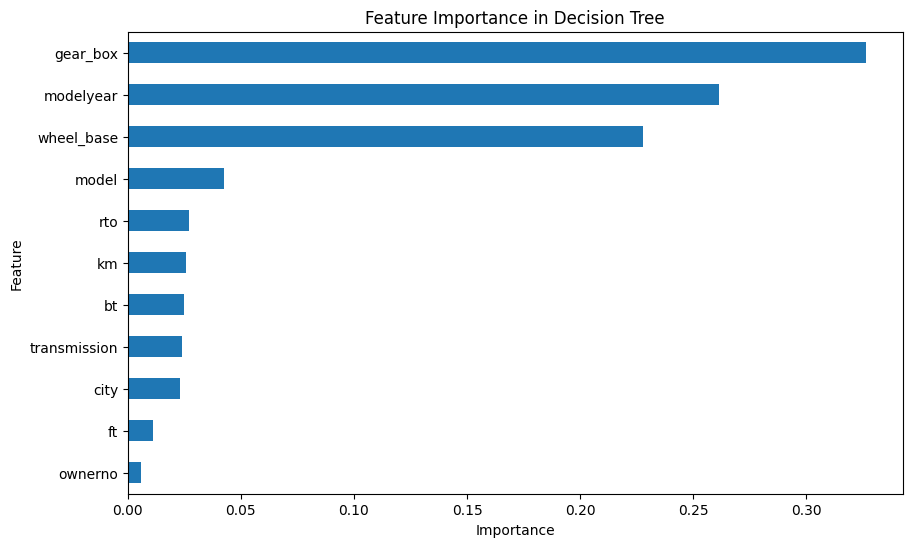

In [113]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume cleaned_df is your DataFrame
X = cleaned_df.iloc[:, :-1].values
y = cleaned_df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get feature importance
feature_importances = model.feature_importances_
feature_names = cleaned_df.columns[:-1]

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plotting feature importance
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()


Random Forests

Mean Absolute Error: 70810.65851961925
Mean Squared Error: 12403216395.522661
R-squared: 0.9009477343287462

Feature Importance:
         Feature  Importance
10      gear_box    0.326736
7      modelyear    0.252328
9     wheel_base    0.246788
6          model    0.046176
3             km    0.029179
8            rto    0.025256
0           city    0.024605
4   transmission    0.018617
2             bt    0.016850
1             ft    0.008166
5        ownerno    0.005299


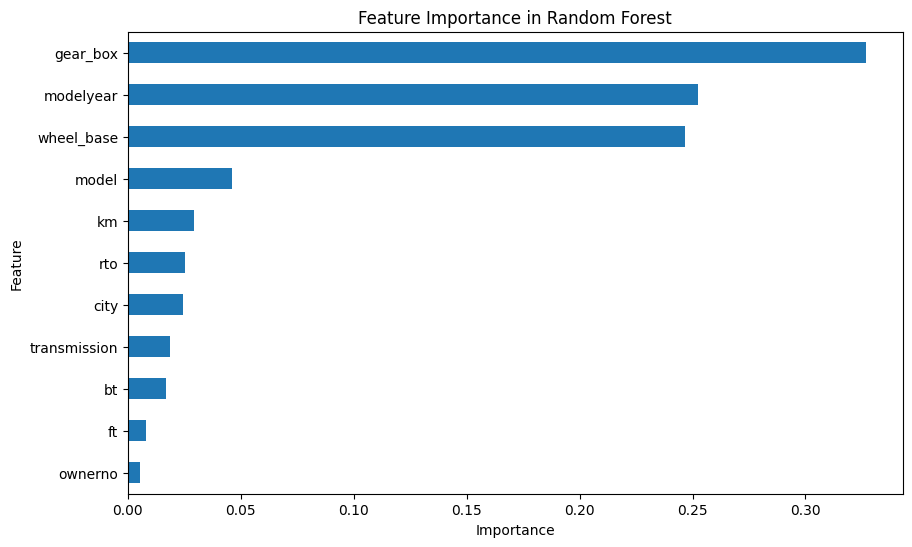

In [114]:
from sklearn.ensemble import RandomForestRegressor
# Assume cleaned_df is your DataFrame
X = cleaned_df.iloc[:, :-1].values
y = cleaned_df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get feature importance
feature_importances = model.feature_importances_
feature_names = cleaned_df.columns[:-1]

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plotting feature importance
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()


model => GradientBoostingRegressor

Mean Absolute Error: 79698.08954762877
Mean Squared Error: 14905814156.687096
R-squared: 0.8809619523829739

Feature Importance:
         Feature  Importance
9     wheel_base    0.293257
7      modelyear    0.283914
10      gear_box    0.257711
2             bt    0.046112
6          model    0.045767
4   transmission    0.032237
0           city    0.018946
1             ft    0.008496
3             km    0.006707
8            rto    0.004819
5        ownerno    0.002034


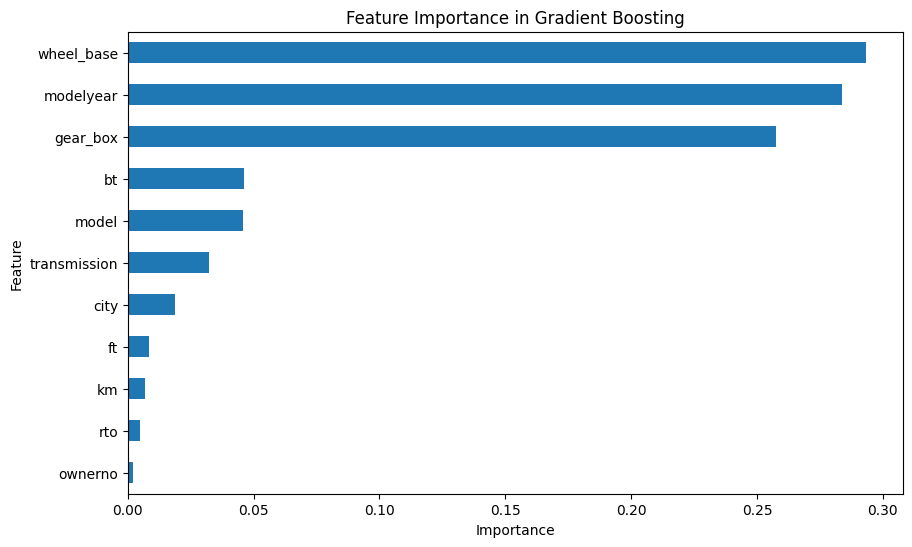

In [115]:
# Initialize and train the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get feature importance
feature_importances = model.feature_importances_
feature_names = cleaned_df.columns[:-1]

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plotting feature importance
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()


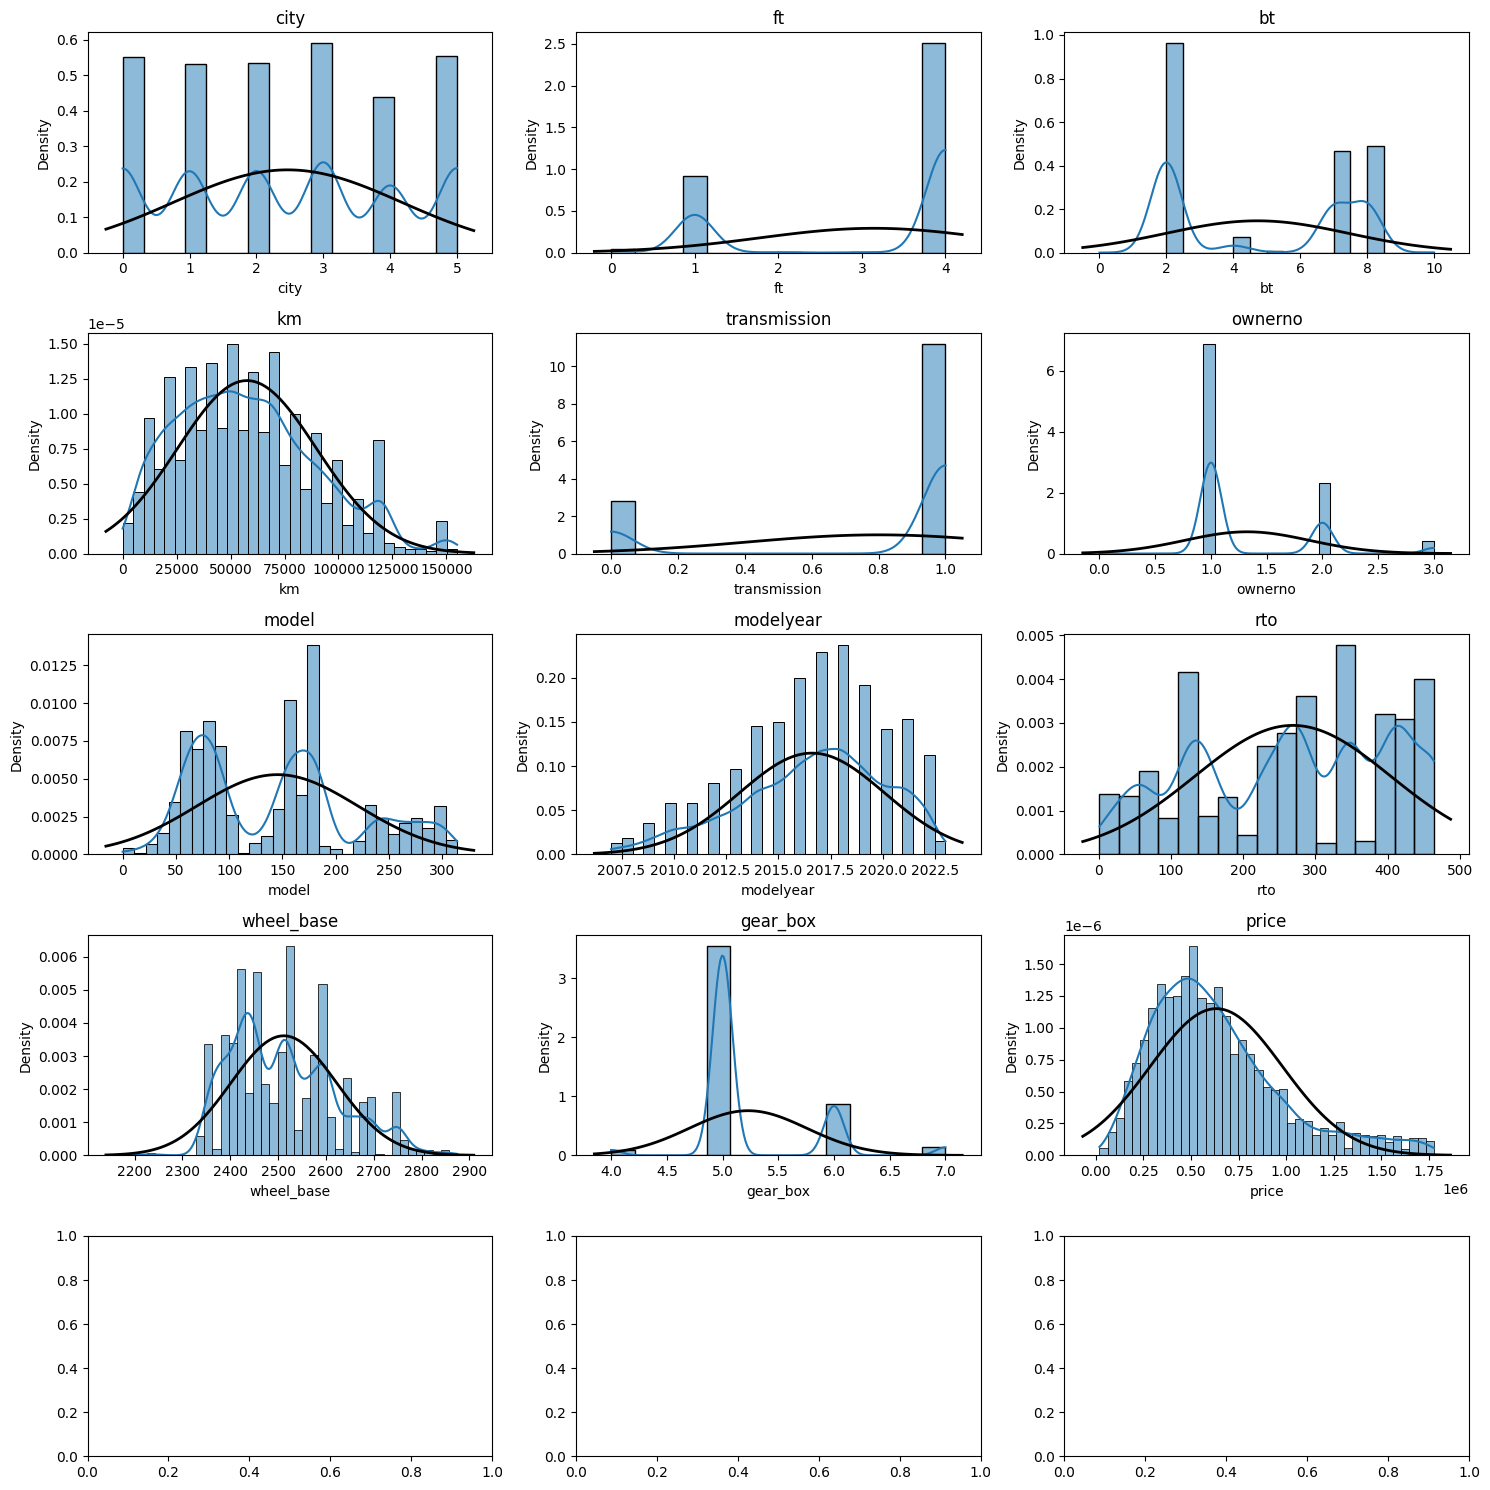

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

data = cleaned_df
# Plot histograms with normal distribution fit
columns = data.columns
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

for i, column in enumerate(columns):
    sns.histplot(data[column], kde=True, ax=axes[i//3, i%3], stat="density")
    mu, std = norm.fit(data[column])
    xmin, xmax = axes[i//3, i%3].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axes[i//3, i%3].plot(x, p, 'k', linewidth=2)
    axes[i//3, i%3].set_title(f'{column}')
    axes[i//3, i%3].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Assume cleaned_df is your DataFrame
X = cleaned_df.iloc[:, :-1].values
y = cleaned_df.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Get feature importance
feature_importances = model.feature_importances_
feature_names = cleaned_df.columns[:-1]

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plotting feature importance
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(10, 6))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()
